<a href="https://colab.research.google.com/github/nickwan/nwds-stream-notebooks/blob/main/tiktoks_lmao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# font

In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '24px'
      break
    }
  }
  '''))
get_ipython().events.register('pre_run_cell', increase_font)

# tiktoks

current formula:  
get a clip  
calculate the league avg  
calculate where the clip ranks vs the league  

In [ ]:
!pip install catboost

<IPython.core.display.Javascript object>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.4 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
from scipy.stats import percentileofscore
from sklearn.model_selection import KFold
from PIL import Image
from IPython.display import display
import requests


<IPython.core.display.Javascript object>

In [ ]:
baseball_dir = 'drive/My Drive/baseball/data'
football_dir = 'drive/My Drive/nflfastR-data/pbp'

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv(f'{baseball_dir}/2025-data.csv')
df.shape

<IPython.core.display.Javascript object>

(707110, 122)

In [ ]:
def get_headshot(player_id):
  img_url = f"https://img.mlbstatic.com/mlb-photos/image/upload/w_213,d_people:generic:headshot:silo:current.png,q_auto:best,f_auto/v1/people/{player_id}/headshot/67/current"
  img = Image.open(requests.get(img_url, stream=True).raw)
  return img

<IPython.core.display.Javascript object>

In [ ]:
pitch

<IPython.core.display.Javascript object>

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,spray_angle,attack_zone,swing,batter_name
576084,CH,2025-04-19,87.0,-2.61,5.20,"Roupp, Landen",545361,694738,home_run,hit_into_play,...,17.0,16.144896,-7.87958,47.09395,26.045073,31.528859,-32.519639,shadow,0,"trout, mike"
576139,CU,2025-04-19,76.2,-2.36,5.53,"Roupp, Landen",545361,694738,home_run,hit_into_play,...,29.8,NaN,NaN,NaN,NaN,NaN,-28.108036,heart,0,"trout, mike"


<IPython.core.display.Javascript object>

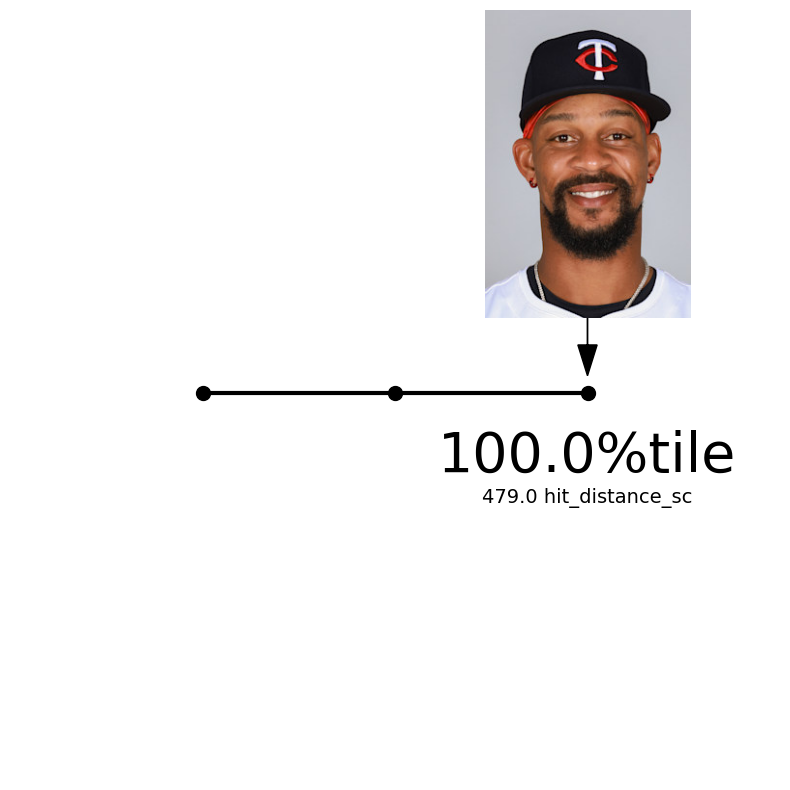

In [ ]:
pid = 683004
bid = 621439

y = 'hit_distance_sc'

player = bid

pitch = df.loc[(df['batter']==bid) & (df['pitcher']==pid)]
pitch = pitch.loc[pitch['events']=='home_run']
pct = percentileofscore(df[y].dropna(), pitch[y].values[0])
img = get_headshot(player)

resizex = img.size[0]/4
resizey = img.size[1]/4

xs = pct - (resizex/2)
xf = pct + (resizex/2)
ys = 20
yf = 20 + resizey

ax = plt.figure(figsize=(10,10))
plt.plot([0,100],[.5,.5], 'k-', lw=3)
plt.scatter([0,50,100],[.5,.5,.5], c='k', s=100)
plt.arrow(pct, 55, 0, -50, length_includes_head=True,
          head_width=5, head_length=8, color='k',zorder=4)
plt.gca().imshow(img, extent=[xs,xf,ys,yf],zorder=5)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.text(pct,-20, f'{round(pct,1)}%tile',ha='center',fontsize=40)
plt.text(pct,-28, f'{round(pitch[y].values[0],1)} {y}',ha='center',fontsize=14)
plt.ylim(-100,100)
plt.xlim(-50,150)
sns.despine(left=True, bottom=True)
plt.show()